<a href="https://colab.research.google.com/github/a-cuc/CPE311/blob/main/Finals/Module%2011/SW%2011.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Submitted by: Angelo Luis C. Cu

In [ ]:
!pip install ucimlrepo

**Automobile**

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
automobile = fetch_ucirepo(id=10)

# data (as pandas dataframes)
X = automobile.data.features
y = automobile.data.targets

# metadata
print(automobile.metadata)

# variable information
print(automobile.variables)

{'uci_id': 10, 'name': 'Automobile', 'repository_url': 'https://archive.ics.uci.edu/dataset/10/automobile', 'data_url': 'https://archive.ics.uci.edu/static/public/10/data.csv', 'abstract': "From 1985 Ward's Automotive Yearbook", 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 205, 'num_features': 25, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['symboling'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1985, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5B01C', 'creators': ['Jeffrey Schlimmer'], 'intro_paper': None, 'additional_info': {'summary': 'This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which th

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
automobile = pd.concat([X, y], axis=1)
automobile

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,turbo,gas,volvo,95.0,-1
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,mpfi,173,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,idi,145,...,109.1,front,rwd,sedan,4.0,turbo,diesel,volvo,95.0,-1


In [ ]:
# checking for duplicates
automobile[automobile.duplicated()].shape[0]

0

In [ ]:
# checking for missing values
automobile.info()
# it can be noticed that price, peak-rpm, horsepower, stroke, bore, num-of-doors, and normalized-losses has NaN values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

In [ ]:
automobile.price.value_counts()
# since the automobile price has varied values, I decided to just fill the missing values with the mean

price
8921.0     2
18150.0    2
8845.0     2
8495.0     2
7609.0     2
          ..
45400.0    1
16503.0    1
5389.0     1
6189.0     1
22625.0    1
Name: count, Length: 186, dtype: int64

In [ ]:
automobile.price.fillna(automobile.price.mean(), inplace=True)

In [ ]:
automobile['peak-rpm'].value_counts()
# as 5500 rpm is the most frequent, I decided to change the NaN values to 5500 rpm

peak-rpm
5500.0    37
4800.0    36
5000.0    27
5200.0    23
5400.0    13
6000.0     9
5800.0     7
5250.0     7
4500.0     7
4150.0     5
4200.0     5
4350.0     4
4750.0     4
5100.0     3
5900.0     3
4250.0     3
4400.0     3
6600.0     2
4650.0     1
5600.0     1
5750.0     1
4900.0     1
5300.0     1
Name: count, dtype: int64

In [ ]:
automobile['peak-rpm'].fillna(5500, inplace=True)

In [ ]:
automobile.horsepower.value_counts()
# as the data is evenly distributed, I decided to use forward fill

horsepower
68.0     19
70.0     11
69.0     10
116.0     9
110.0     8
95.0      7
114.0     6
160.0     6
101.0     6
62.0      6
88.0      6
145.0     5
76.0      5
97.0      5
82.0      5
84.0      5
102.0     5
92.0      4
111.0     4
123.0     4
86.0      4
207.0     3
182.0     3
90.0      3
121.0     3
152.0     3
85.0      3
73.0      3
161.0     2
94.0      2
56.0      2
112.0     2
184.0     2
155.0     2
156.0     2
52.0      2
100.0     2
162.0     2
176.0     2
140.0     1
115.0     1
134.0     1
78.0      1
48.0      1
288.0     1
143.0     1
142.0     1
200.0     1
58.0      1
55.0      1
60.0      1
175.0     1
154.0     1
72.0      1
120.0     1
64.0      1
135.0     1
262.0     1
106.0     1
Name: count, dtype: int64

In [ ]:
automobile.horsepower.fillna(method='ffill', inplace=True)

In [ ]:
automobile.stroke.value_counts()
# as the data is evenly distributed, I decided to use forward fill

stroke
3.40    20
3.03    14
3.23    14
3.15    14
3.39    13
2.64    11
3.29     9
3.35     9
3.46     8
3.07     6
3.58     6
3.50     6
3.27     6
3.41     6
3.11     6
3.19     6
3.52     5
3.64     5
3.47     4
3.86     4
3.54     4
3.90     3
2.90     3
3.08     2
2.19     2
2.68     2
3.10     2
4.17     2
2.80     2
3.12     1
3.21     1
2.07     1
2.36     1
3.16     1
2.76     1
2.87     1
Name: count, dtype: int64

In [ ]:
automobile.stroke.fillna(method='ffill', inplace=True)

In [ ]:
automobile.bore.value_counts()
# as the data is evenly distributed, I decided to use forward fill

bore
3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.78     8
3.31     8
3.43     8
3.27     7
2.91     7
3.54     6
3.05     6
3.58     6
3.39     6
3.01     5
3.70     5
3.35     4
3.17     3
3.59     3
3.74     3
3.33     2
3.24     2
3.94     2
3.47     2
3.80     2
3.63     2
3.50     2
3.13     2
2.68     1
2.99     1
3.08     1
3.61     1
2.92     1
3.60     1
2.54     1
3.34     1
3.76     1
Name: count, dtype: int64

In [ ]:
automobile.bore.fillna(method='ffill',inplace=True)

In [ ]:
automobile['num-of-doors'].value_counts()
# as 4 doors is the most frequent, I decided to change the NaN values to 4.0

num-of-doors
4.0    114
2.0     89
Name: count, dtype: int64

In [ ]:
automobile['num-of-doors'].fillna(4.0, inplace=True)

In [ ]:
automobile['normalized-losses'].value_counts()
# as the data is evenly distributed, I decided to use forward fill

normalized-losses
161.0    11
91.0      8
150.0     7
128.0     6
134.0     6
104.0     6
95.0      5
102.0     5
103.0     5
74.0      5
85.0      5
168.0     5
94.0      5
65.0      5
106.0     4
122.0     4
148.0     4
118.0     4
93.0      4
101.0     3
125.0     3
137.0     3
154.0     3
83.0      3
115.0     3
119.0     2
87.0      2
194.0     2
197.0     2
108.0     2
89.0      2
164.0     2
158.0     2
145.0     2
192.0     2
188.0     2
81.0      2
110.0     2
113.0     2
129.0     2
153.0     2
107.0     1
78.0      1
186.0     1
231.0     1
77.0      1
98.0      1
121.0     1
90.0      1
142.0     1
256.0     1
Name: count, dtype: int64

In [ ]:
automobile['normalized-losses'].fillna(method='ffill', inplace=True)

In [ ]:
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              205 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           205 non-null    float64
 4   horsepower         205 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             205 non-null    float64
 7   bore               205 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

In [ ]:
automobile[automobile['normalized-losses'].isna()]

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1


In [ ]:
automobile
# since the first three data points are NaN and cannot be filled, I decided to remove them

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,turbo,gas,volvo,95.0,-1
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,mpfi,173,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,idi,145,...,109.1,front,rwd,sedan,4.0,turbo,diesel,volvo,95.0,-1


In [ ]:
automobile.dropna(inplace=True)

automobile
# all missing data are handled

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2
5,15250.0,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,99.8,front,fwd,sedan,2.0,std,gas,audi,164.0,2
6,17710.0,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,105.8,front,fwd,sedan,4.0,std,gas,audi,158.0,1
7,18920.0,25,19,5500.0,110.0,8.5,3.40,3.19,mpfi,136,...,105.8,front,fwd,wagon,4.0,std,gas,audi,158.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,turbo,gas,volvo,95.0,-1
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,mpfi,173,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,idi,145,...,109.1,front,rwd,sedan,4.0,turbo,diesel,volvo,95.0,-1


In [ ]:
# converting the categorical to numerical
# getting the unique values
columns = [
    'fuel-system','engine-type','engine-location','drive-wheels','body-style','aspiration','fuel-type','make'
] # columns to get the unique values
unique_values = []

# gets the unique values of a column and appends it to the unique_values list
for column in columns:
  unique_values.append(automobile[column].unique().tolist())
unique_values

[['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
 ['ohc', 'l', 'dohc', 'ohcv', 'rotor', 'ohcf', 'dohcv'],
 ['front', 'rear'],
 ['fwd', '4wd', 'rwd'],
 ['sedan', 'wagon', 'hatchback', 'hardtop', 'convertible'],
 ['std', 'turbo'],
 ['gas', 'diesel'],
 ['audi',
  'bmw',
  'chevrolet',
  'dodge',
  'honda',
  'isuzu',
  'jaguar',
  'mazda',
  'mercedes-benz',
  'mercury',
  'mitsubishi',
  'nissan',
  'peugot',
  'plymouth',
  'porsche',
  'renault',
  'saab',
  'subaru',
  'toyota',
  'volkswagen',
  'volvo']]

In [ ]:
# creates the dictionaries
result_dicts = [] # stores the results here

for data in unique_values:
  keys = [i for i in data]
  values = [i for i in range(1, len(data)+1)]
  result_dicts.append({keys[i] : values[i] for i in range(len(values))})
result_dicts

[{'mpfi': 1,
  '2bbl': 2,
  'mfi': 3,
  '1bbl': 4,
  'spfi': 5,
  '4bbl': 6,
  'idi': 7,
  'spdi': 8},
 {'ohc': 1, 'l': 2, 'dohc': 3, 'ohcv': 4, 'rotor': 5, 'ohcf': 6, 'dohcv': 7},
 {'front': 1, 'rear': 2},
 {'fwd': 1, '4wd': 2, 'rwd': 3},
 {'sedan': 1, 'wagon': 2, 'hatchback': 3, 'hardtop': 4, 'convertible': 5},
 {'std': 1, 'turbo': 2},
 {'gas': 1, 'diesel': 2},
 {'audi': 1,
  'bmw': 2,
  'chevrolet': 3,
  'dodge': 4,
  'honda': 5,
  'isuzu': 6,
  'jaguar': 7,
  'mazda': 8,
  'mercedes-benz': 9,
  'mercury': 10,
  'mitsubishi': 11,
  'nissan': 12,
  'peugot': 13,
  'plymouth': 14,
  'porsche': 15,
  'renault': 16,
  'saab': 17,
  'subaru': 18,
  'toyota': 19,
  'volkswagen': 20,
  'volvo': 21}]

In [ ]:
# maps the categorical data to their numerical counterparts
for column in range(len(columns)):
  automobile.replace(result_dicts[column], inplace=True)

automobile

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,1,109,...,99.8,1,1,1,4.0,1,1,1,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,1,136,...,99.4,1,2,1,4.0,1,1,1,164.0,2
5,15250.0,25,19,5500.0,110.0,8.5,3.40,3.19,1,136,...,99.8,1,1,1,2.0,1,1,1,164.0,2
6,17710.0,25,19,5500.0,110.0,8.5,3.40,3.19,1,136,...,105.8,1,1,1,4.0,1,1,1,158.0,1
7,18920.0,25,19,5500.0,110.0,8.5,3.40,3.19,1,136,...,105.8,1,1,2,4.0,1,1,1,158.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,1,141,...,109.1,1,3,1,4.0,1,1,21,95.0,-1
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,1,141,...,109.1,1,3,1,4.0,2,1,21,95.0,-1
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,1,173,...,109.1,1,3,1,4.0,1,1,21,95.0,-1
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,7,145,...,109.1,1,3,1,4.0,2,2,21,95.0,-1


In [ ]:
# comparing between diesel and gas cars
gas_cars = automobile.query('`fuel-type` == 1')
diesel_cars = automobile.query('`fuel-type` == 2')

In [ ]:
gas_cars.mean()

price                12880.239107
highway-mpg             30.379121
city-mpg                24.741758
peak-rpm              5207.417582
horsepower             108.104396
compression-ratio        8.857802
stroke                   3.232967
bore                     3.321374
fuel-system              2.005495
engine-size            125.769231
num-of-cylinders         4.384615
engine-type              1.879121
curb-weight           2516.461538
height                  53.554396
width                   65.762637
length                 173.247802
wheel-base              98.272527
engine-location          1.016484
drive-wheels             1.730769
body-style               2.071429
num-of-doors             3.087912
aspiration               1.131868
fuel-type                1.000000
make                    12.159341
normalized-losses      129.170330
symboling                0.890110
dtype: float64

In [ ]:
diesel_cars.mean()

price                15838.1500
highway-mpg             34.7500
city-mpg                30.3000
peak-rpm              4435.0000
horsepower              84.4500
compression-ratio       22.0050
stroke                   3.4855
bore                     3.3745
fuel-system              7.0000
engine-size            135.7000
num-of-cylinders         4.3000
engine-type              1.2500
curb-weight           2898.8000
height                  55.8350
width                   67.4300
length                 182.0100
wheel-base             104.3900
engine-location          1.0000
drive-wheels             2.1000
body-style               1.4000
num-of-doors             3.7000
aspiration               1.6500
fuel-type                2.0000
make                    14.3500
normalized-losses      122.3000
symboling                0.1000
dtype: float64

In [ ]:
"""
On average, gas cars has higher horsepower and peak rpm than diesel cars
But diesel cars have higher compression ratio and stroke than gas cars
"""

'\nOn average, gas cars has higher horsepower and peak rpm than diesel cars\nBut diesel cars have higher compression ratio and stroke than gas cars\n'

In [ ]:
# Plotting
%matplotlib inline
import matplotlib.pyplot as plt

<Axes: >

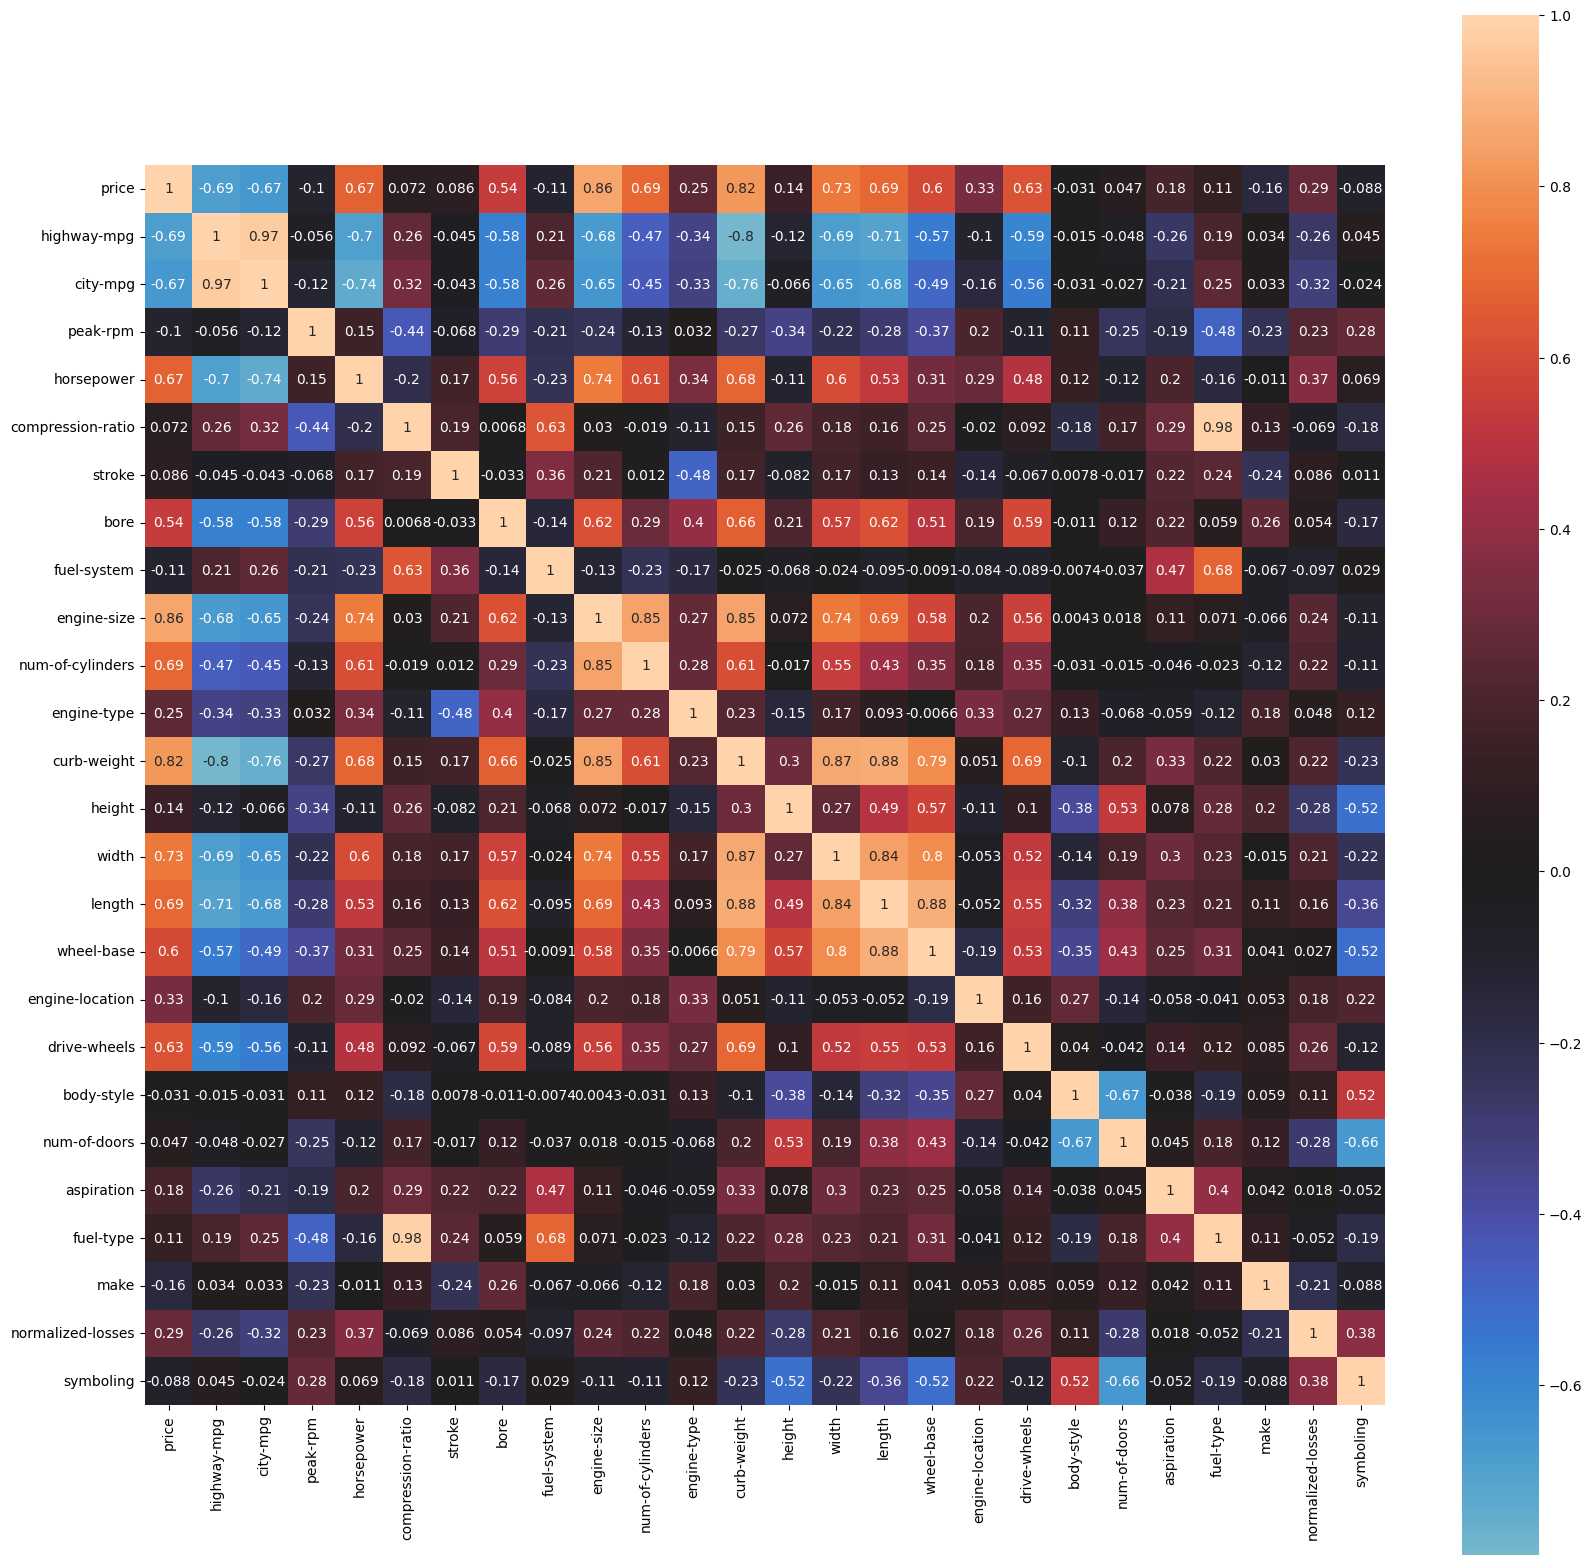

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(
    automobile.sort_index().corr(),
    annot=True, center=0, square=True
)
# there are many notable correlations in this dataframe

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [ ]:
# Perform Linear Regression on Symboling
# Getting the X and Y arrays
X = automobile.drop(['symboling'], axis=1)
y = automobile['symboling']

# The x here is the independent variable
# While y is the dependent variable

In [ ]:
print("X=",X.shape,"\ny=",y.shape)

X= (202, 25) 
y= (202,)


In [ ]:
# Splits the variables to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
model = LinearRegression() # Creates the linear regression model

In [ ]:
model.fit(X_train, y_train) # fits the model to train variables

LinearRegression()

In [ ]:
y_pred = model.predict(X_test) # creates a prediction for y

In [ ]:
# evaluation metrics, lower is better
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

In [ ]:
MAE

0.5103866892159923

In [ ]:
MSE

0.4338473419926113

In [ ]:
RMSE

0.6586708905004163

In [ ]:
test_residual = y_test - y_pred # gets residual

Text(0.5, 0.98, 'KDE of Residual Plot')

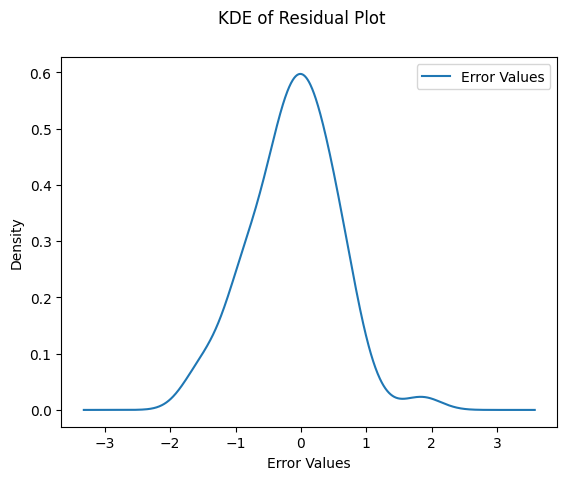

In [ ]:
# Gets the residual plot
pd.DataFrame({'Error Values' : (test_residual)}).plot.kde()
plt.xlabel('Error Values')
plt.suptitle('KDE of Residual Plot')

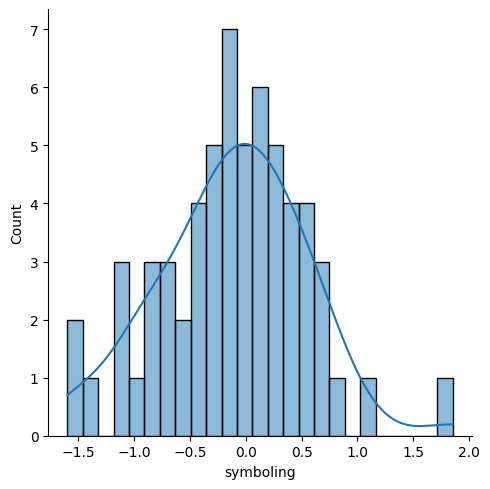

In [ ]:
sns.displot(test_residual, bins=25, kde=True)
# as both of these plots somewhat follow the normal distribution,
# the linear regression is valid

Text(0.5, 0.98, 'Residual Plot')

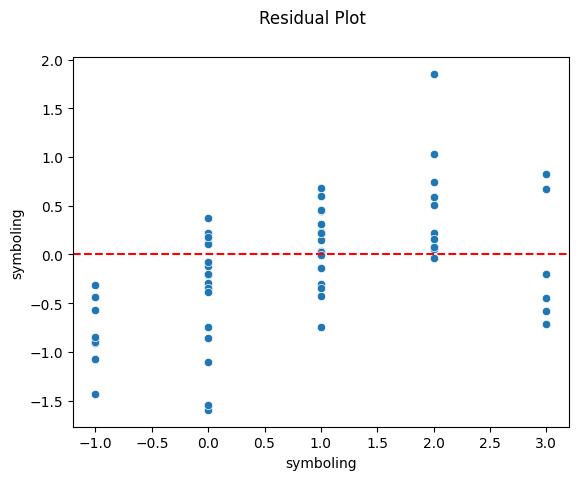

In [ ]:
sns.scatterplot(x=y_test, y=test_residual)
plt.axhline(y=0, color='r', ls='--')
plt.suptitle('Residual Plot')
# since the residual plot shows are not random,
# and that they lie on specific points, the model might not be accurate

Text(0.5, 0.98, 'Actual vs. Predicted Values')

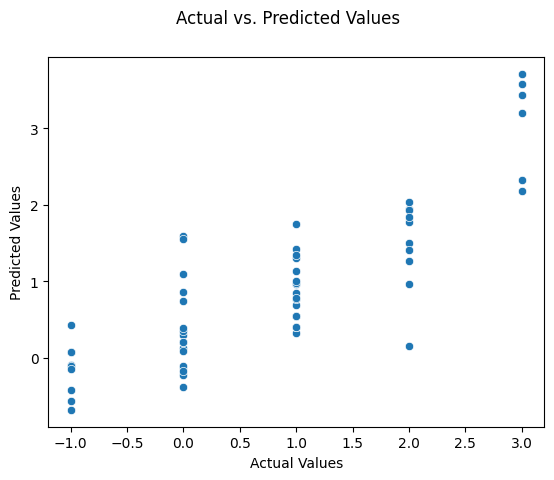

In [ ]:
# comparing the test value with the predicted value
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.suptitle('Actual vs. Predicted Values')
# the line is somewhat linear but there is a degree of variability

**Wine**

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

In [ ]:
wine = pd.concat([X,y], axis=1)

wine

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [ ]:
# checking for duplicates
wine[wine.duplicated()].shape[0]

0

In [ ]:
# getting the mean per class
first_wine = wine.query('`class` == 1')
second_wine = wine.query('`class` == 2')
third_wine = wine.query('`class` == 3')

In [ ]:
first_wine.mean()

Alcohol                           13.744746
Malicacid                          2.010678
Ash                                2.455593
Alcalinity_of_ash                 17.037288
Magnesium                        106.338983
Total_phenols                      2.840169
Flavanoids                         2.982373
Nonflavanoid_phenols               0.290000
Proanthocyanins                    1.899322
Color_intensity                    5.528305
Hue                                1.062034
0D280_0D315_of_diluted_wines       3.157797
Proline                         1115.711864
class                              1.000000
dtype: float64

In [ ]:
second_wine.mean()

Alcohol                          12.278732
Malicacid                         1.932676
Ash                               2.244789
Alcalinity_of_ash                20.238028
Magnesium                        94.549296
Total_phenols                     2.258873
Flavanoids                        2.080845
Nonflavanoid_phenols              0.363662
Proanthocyanins                   1.630282
Color_intensity                   3.086620
Hue                               1.056282
0D280_0D315_of_diluted_wines      2.785352
Proline                         519.507042
class                             2.000000
dtype: float64

In [ ]:
third_wine.mean()

Alcohol                          13.153750
Malicacid                         3.333750
Ash                               2.437083
Alcalinity_of_ash                21.416667
Magnesium                        99.312500
Total_phenols                     1.678750
Flavanoids                        0.781458
Nonflavanoid_phenols              0.447500
Proanthocyanins                   1.153542
Color_intensity                   7.396250
Hue                               0.682708
0D280_0D315_of_diluted_wines      1.683542
Proline                         629.895833
class                             3.000000
dtype: float64

In [ ]:
"""
On average, the alcohol level of the first class is the highest,
followed by the third and then the second class

It is also notable that the first class contained much higher levels
of proline compared to the other two

However, the third class has much more intense color compared to the two
"""

'\nOn average, the alcohol level of the first class is the highest,\nfollowed by the third and then the second class\n\nIt is also notable that the first class contained much higher levels\nof proline compared to the other two\n\nHowever, the third class has much more intense color compared to the two\n'

<Axes: >

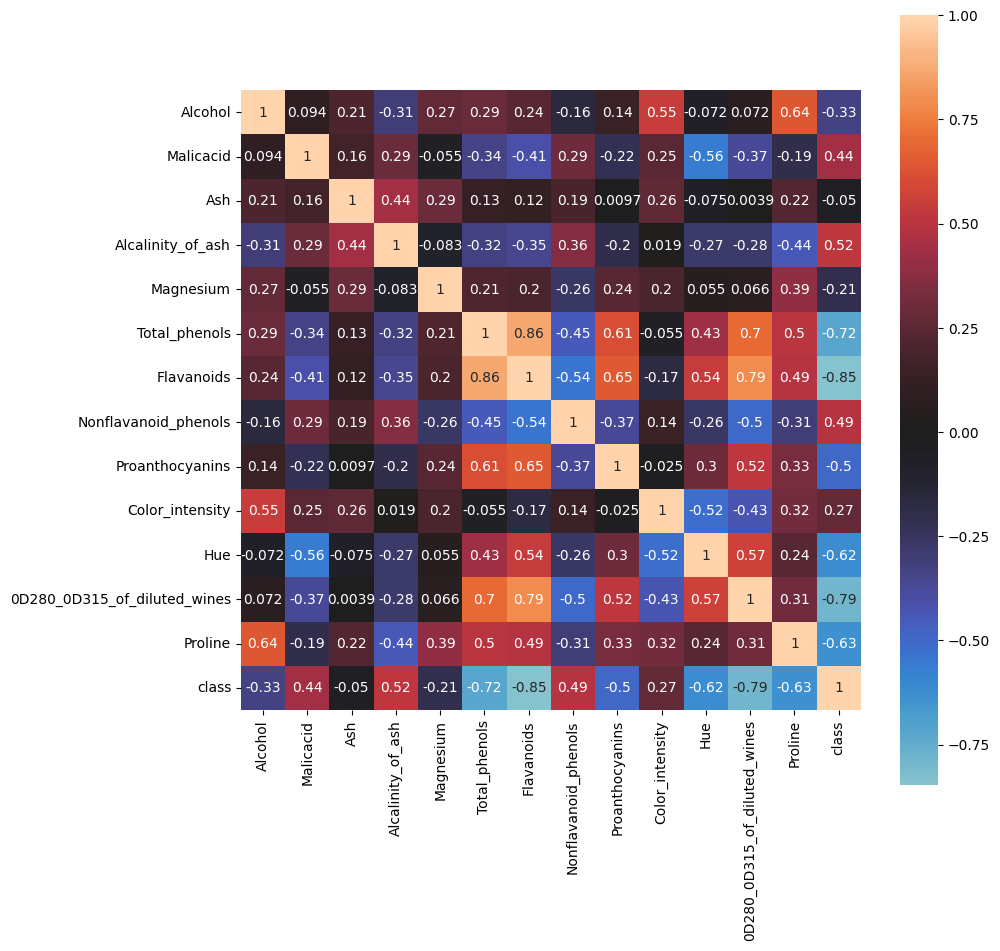

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(
    wine.sort_index().corr(),
    annot=True, center=0, square=True
)

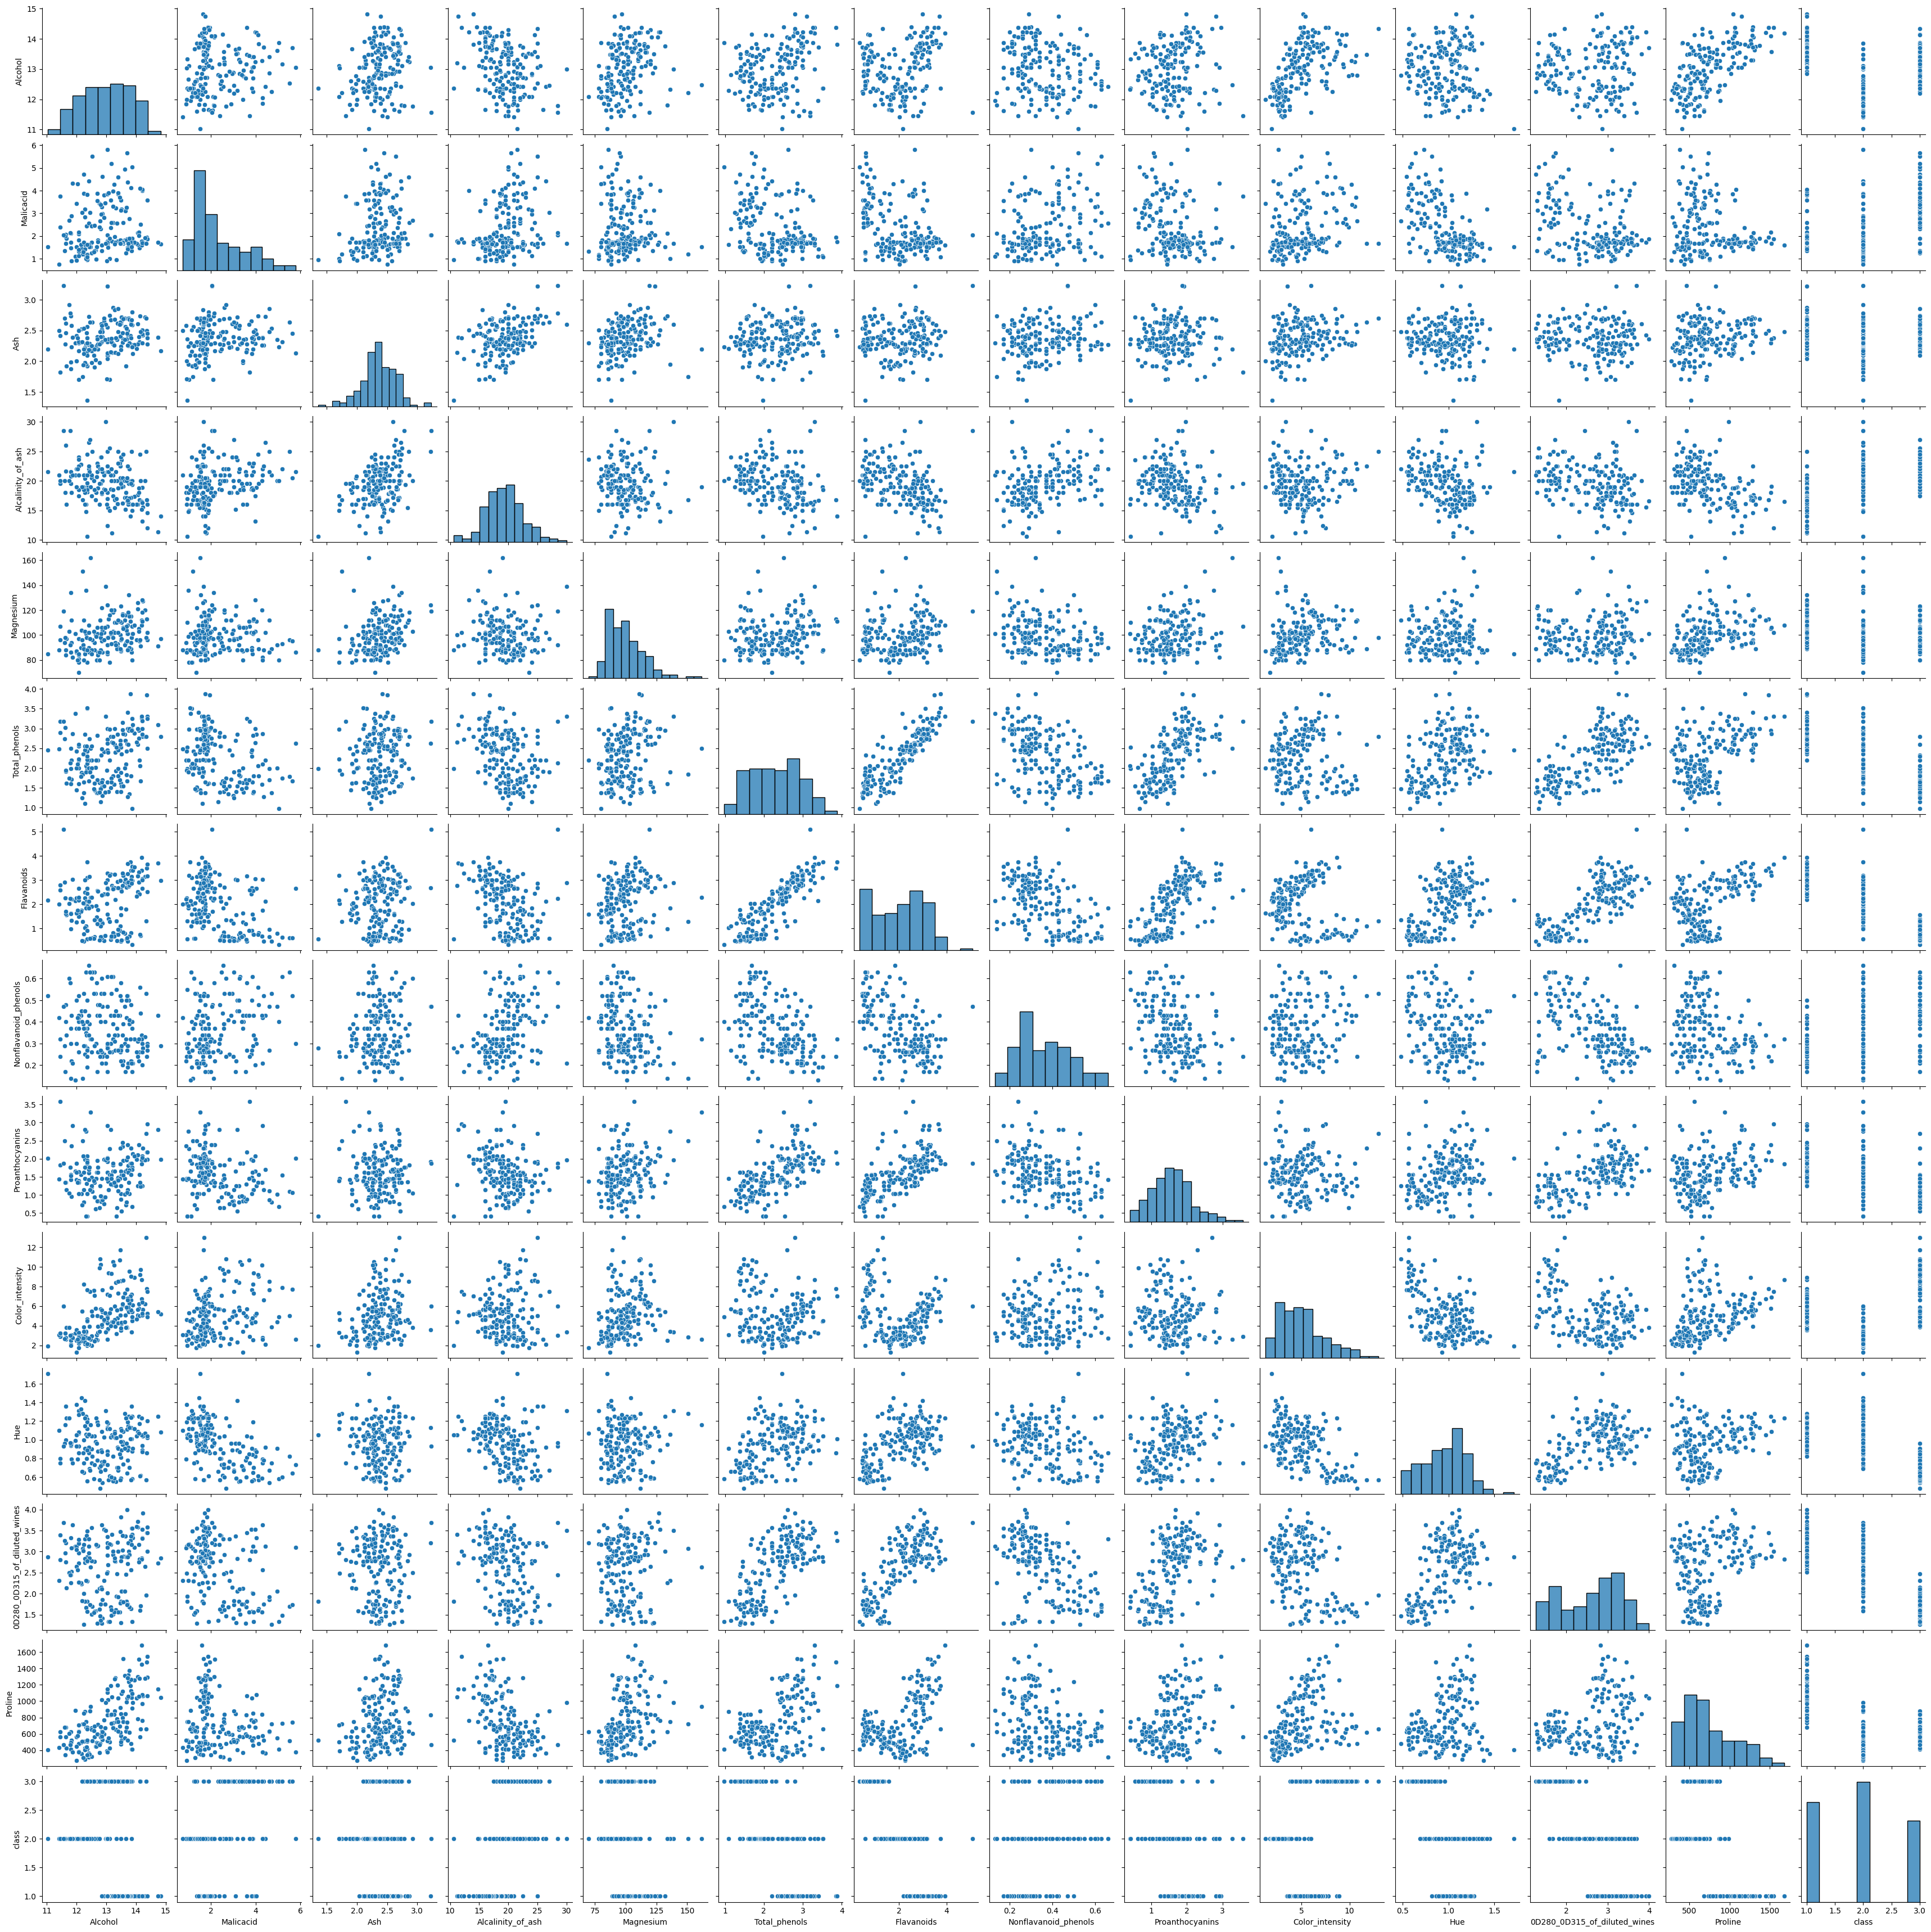

In [ ]:
sns.pairplot(wine)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import binarize
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
# Perform Logistic Regression on class
# creating the X and Y arrays
X = wine.drop(['class'], axis=1)
y = wine['class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape, X_test.shape

((142, 13), (36, 13))

In [ ]:
# Performing Feature Scaling
cols = X_train.columns
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns = [cols])
X_test = pd.DataFrame(X_test, columns = [cols])
X_train.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,0.525500,0.332506,0.541345,0.461594,0.326776,0.416785,0.452341,0.440606,0.375334,0.321264,0.353292,0.482149,0.359850
std,0.216983,0.227161,0.144991,0.177451,0.154882,0.220033,0.298447,0.240960,0.187095,0.203107,0.196511,0.264704,0.241675
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354167,0.175662,0.463710,0.342784,0.206522,0.217626,0.173547,0.264151,0.260285,0.155503,0.205128,0.221612,0.176014
50%,0.540323,0.235234,0.537634,0.458763,0.304348,0.399281,0.478593,0.396226,0.359177,0.283276,0.358974,0.545788,0.306285
75%,0.700941,0.505601,0.645161,0.561856,0.399457,0.588129,0.700306,0.603774,0.486551,0.426195,0.495726,0.695055,0.511337
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Training a Logistic Regression Model
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
# Predicting next results for TEST variables
y_pred_test = logreg.predict(X_test)
y_pred_test

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 3, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1])

In [ ]:
# Getting probability of getting 1
logreg.predict_proba(X_test)[:,0]

array([0.83411707, 0.08169456, 0.33794154, 0.79491944, 0.2372458 ,
       0.237406  , 0.87096795, 0.03861458, 0.16257044, 0.05946295,
       0.1482802 , 0.03716879, 0.92972498, 0.47744117, 0.0838979 ,
       0.13261824, 0.78069736, 0.95517064, 0.0825623 , 0.84310019,
       0.47020366, 0.67960296, 0.47193266, 0.24693731, 0.08366256,
       0.16146061, 0.21250699, 0.05442331, 0.07420845, 0.07434986,
       0.83480123, 0.85379414, 0.08617887, 0.8224449 , 0.87731904,
       0.6611851 ])

In [ ]:
# Getting probability of getting 2
logreg.predict_proba(X_test)[:,1]

array([0.1240818 , 0.06966025, 0.65228402, 0.1607158 , 0.61192177,
       0.75455152, 0.08070117, 0.14839743, 0.77629276, 0.77373406,
       0.13986198, 0.07780088, 0.03752654, 0.51475621, 0.07579536,
       0.85273997, 0.16126423, 0.02246023, 0.44592902, 0.13936754,
       0.52143812, 0.24521823, 0.43573301, 0.71879674, 0.58483752,
       0.76777135, 0.73705714, 0.8411666 , 0.73358901, 0.06019109,
       0.12898216, 0.11348826, 0.61642905, 0.06319566, 0.08703462,
       0.31648131])

In [ ]:
# Getting probability of getting 3
logreg.predict_proba(X_test)[:,2]
# It can be noticed that the results are varied accross classes

array([0.04180113, 0.84864519, 0.00977444, 0.04436476, 0.15083243,
       0.00804248, 0.04833088, 0.81298799, 0.0611368 , 0.16680299,
       0.71185782, 0.88503033, 0.03274848, 0.00780262, 0.84030674,
       0.01464178, 0.0580384 , 0.02236913, 0.47150868, 0.01753227,
       0.00835821, 0.0751788 , 0.09233433, 0.03426595, 0.33149992,
       0.07076804, 0.05043587, 0.10441009, 0.19220254, 0.86545905,
       0.03621662, 0.0327176 , 0.29739208, 0.11435944, 0.03564634,
       0.02233359])

In [ ]:
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9722


In [ ]:
# Predicting next results for TRAIN variables
y_pred_train = logreg.predict(X_train)
y_pred_train

array([3, 2, 2, 3, 1, 1, 2, 2, 2, 1, 3, 2, 3, 1, 3, 3, 1, 3, 1, 2, 3, 3,
       2, 3, 3, 1, 3, 3, 2, 3, 3, 2, 1, 2, 2, 2, 1, 1, 2, 2, 3, 3, 2, 2,
       2, 3, 3, 1, 3, 2, 2, 2, 2, 2, 1, 1, 2, 1, 3, 1, 3, 1, 1, 2, 1, 2,
       2, 1, 3, 2, 1, 2, 2, 2, 3, 1, 3, 3, 1, 1, 2, 3, 1, 1, 2, 2, 1, 1,
       1, 3, 2, 1, 2, 3, 1, 2, 3, 3, 1, 1, 3, 1, 3, 2, 1, 1, 2, 1, 3, 2,
       3, 1, 3, 3, 3, 1, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 1, 1, 3, 2,
       2, 2, 1, 1, 1, 2, 2, 2, 1, 3])

In [ ]:
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))

Model accuracy score: 0.9789


In [ ]:
# Checking for overfitting and underfitting
# getting set scores

print('Training set score: {0:0.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {0:0.4f}'.format(logreg.score(X_test, y_test)))
# Since the set score are the near each other, there is not overfitting

Training set score: 0.9789
Test set score: 0.9722


In [ ]:
# increasing the C to 100
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [ ]:
print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))
# It can be noticed that the set score became perfect on both the training and test set

Training set score: 1.0000
Test set score: 1.0000


In [ ]:
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [ ]:
print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))
# It can be noticed that the score became lower on both the training and test set

Training set score: 0.8944
Test set score: 0.8889


In [ ]:
# Creating an displaying a confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
# It can be noticed that there is only 1 which is not on the main diagonal

Confusion matrix

 [[14  0  0]
 [ 0 15  1]
 [ 0  0  6]]


Text(50.722222222222214, 0.5, 'Predicted Values')

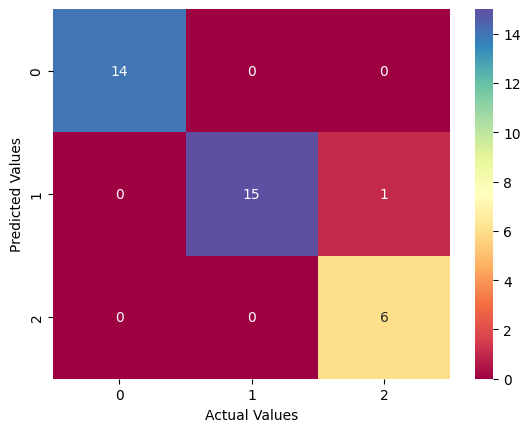

In [ ]:
# Visualizing with a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Spectral')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [ ]:
# Creates a classification report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.94      0.97        16
           3       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36



Text(0, 0.5, 'Frequency')

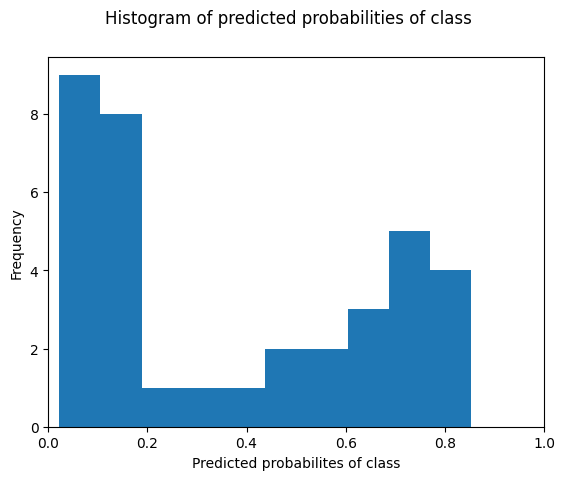

In [ ]:
# Plots predicted probabilities to a histogram
y_pred1 = logreg.predict_proba(X_test)[:,1] # using the test variable
plt.hist(y_pred1, bins=10)
plt.suptitle('Histogram of predicted probabilities of class')
plt.xlim(0,1)
plt.xlabel('Predicted probabilites of class')
plt.ylabel('Frequency')
# The plot is highly skewed to 0, but there is also a notable bar on 0.8

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


Text(0, 0.5, 'True Positive Rate (Sensitivity)')

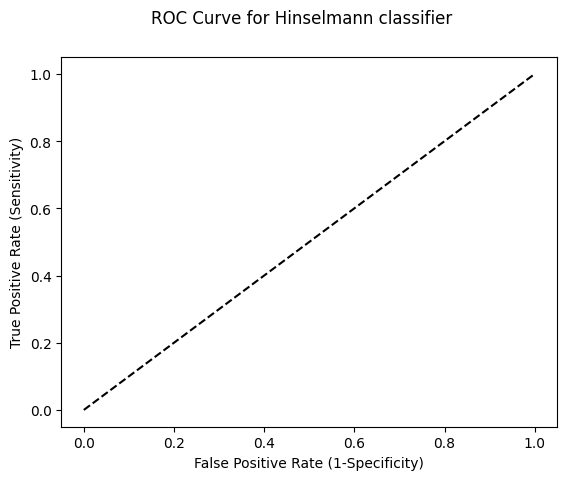

In [ ]:
# Creates an ROC Curve
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train, pos_label = 'Yes') # Using train variables
plt.plot(fpr, tpr, linewidth = 2)
plt.plot([0,1], [0,1], 'k--')
plt.suptitle('ROC Curve for Hinselmann classifier')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
# It seems that there is an error as the false positive is 0

In [ ]:
# Gets the 5-Fold Cross Validation score
scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy').mean()
print('Cross-validation score: {:.4f}'.format(scores))
# The result is higher than 0.9, which suggests high accuracy

Cross-validation score: 0.9648


In [ ]:
# Using GridSearch CV
parameters = [{'penalty':['l1', 'l2']},
              {'C':[1,10,100,1000]}]
grid_search = GridSearchCV(estimator = logreg,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose = 0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [ ]:
# Gets the best model
print('GridSearch CV best score: {:.4f}\n\n'.format(grid_search.best_score_))
print('Parameters that give the best results: \n\n',(grid_search.best_params_))
print('\n\nEstimator that was chosen by the search: \n\n',(grid_search.best_estimator_))

GridSearch CV best score: 0.9650


Parameters that give the best results: 

 {'penalty': 'l1'}


Estimator that was chosen by the search: 

 LogisticRegression(penalty='l1', random_state=0, solver='liblinear')


In [ ]:
# Gets the GridSearch CV score on test set
print('GridSearch CV score on test set: {:.4f}\n\n'.format(grid_search.score(X_test, y_test)))
# The results are higher compared to the normal model

GridSearch CV score on test set: 0.9444


